In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import src.random_forest
import src.ridge

sns.axes_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("data/word_frequencies.csv")
df.head()

,word,frequency
0,wine,90599
1,flavors,77847
2,fruit,60255
3,finish,37730
4,aromas,35828


In [5]:
words = np.array(df['word'])

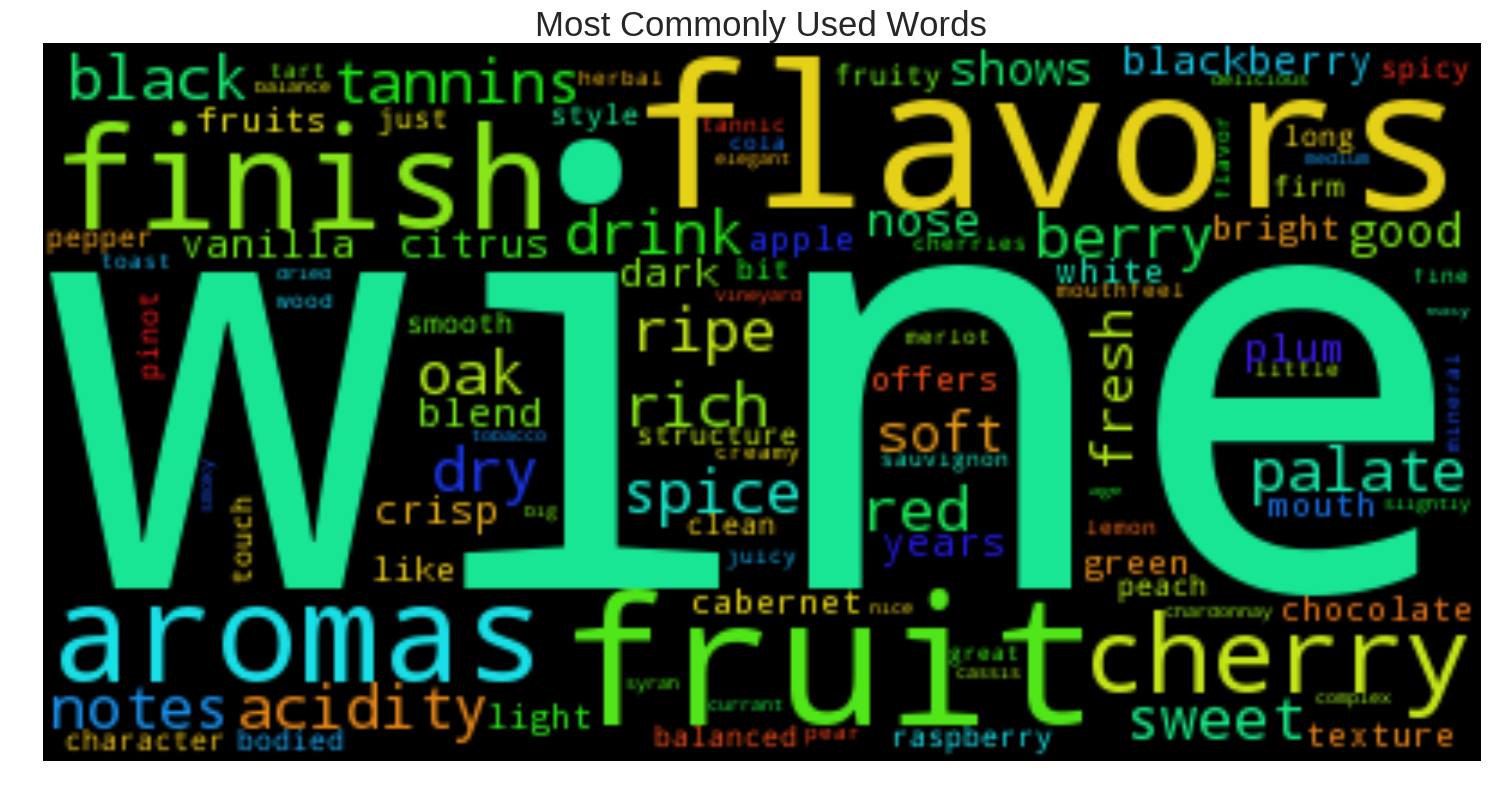

In [6]:
num_words = 100
wordcloud = WordCloud().generate_from_frequencies( zip( words[:num_words], np.ones(num_words, int) ) )

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Commonly Used Words", size=25)
plt.tight_layout()
plt.savefig("images/common_words.png")
plt.show()

In [7]:
rf = src.random_forest.load_regressor("models/random_forest_model.pkl", "vectorizers/random_forest_vectorizer.pkl")

In [8]:
ridge = src.ridge.load_regressor("models/ridge_model.pkl", "vectorizers/ridge_vectorizer.pkl")

In [11]:
ridge_scores = ridge.predict_text(words)
rf_scores = rf.predict_text(words)

In [12]:
ridge_indices = np.argsort(-ridge_scores)
rf_indices = np.argsort(-rf_scores)

In [13]:
print words[ridge_indices[:5]]
print ridge_scores[ridge_indices[:5]]

['gorgeous' 'beautiful' 'complex' 'years' 'delicious']
[ 96.8865454   96.39458662  95.50878692  95.45680945  95.43966458]


In [14]:
print words[rf_indices[:5]]
print rf_scores[rf_indices[:5]]

['years' 'long' 'beautiful' 'rich' 'dense']
[ 90.5  90.2  89.7  88.8  88.7]


In [15]:
frequencies = np.array(df['frequency'])

In [21]:
df2 = pd.DataFrame(np.vstack((words, frequencies, ridge_scores, rf_scores)).T)
df2.columns = ['word','frequency','ridge_rating','rf_rating']
df2['frequency'] = df2['frequency'].apply(int)
df2['ridge_rating'] = df2['ridge_rating'].apply(float)
df2['rf_rating'] = df2['rf_rating'].apply(float)

In [31]:
df2.sort_values(by="ridge_rating", ascending=True).head(20)

,word,frequency,ridge_rating,rf_rating
425,lacks,1380,74.202491,84.2
1662,strange,258,75.474435,84.8
1944,acceptable,202,76.193953,82.3
631,vegetal,888,76.509528,81.6
836,harsh,651,77.069419,83.1
4707,bardolino,42,77.277502,84.8
2918,weird,101,77.570599,84.5
1542,odd,285,77.600854,84.4
1780,weedy,231,77.622374,84.8
103,simple,5889,77.733008,83.8


In [32]:
df2.sort_values(by="rf_rating", ascending=True).head(20)

,word,frequency,ridge_rating,rf_rating
366,smells,1720,81.038812,81.3
631,vegetal,888,76.509528,81.6
494,rough,1149,78.553607,82.0
14,sweet,22525,83.045579,82.1
131,tastes,4826,82.088684,82.2
1944,acceptable,202,76.193953,82.3
422,raw,1387,80.966517,82.4
198,sharp,3368,80.922041,82.5
193,bitter,3427,79.782468,82.7
1,flavors,77847,81.511077,82.9
